# 5 Preprocessing

## 5.1 Data Inspection

### 5.1.1 Import libraries, load and display data 

In [692]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [637]:
# load the dataset
data = pd.read_csv('news_articles.csv')

In [638]:
# display first few rows 
data.head(2)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0


### 5.1.2 Data attributes and size 

In [639]:
# list of columns (attributes) of dataset 
data.columns

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'label', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage'],
      dtype='object')

In [640]:
# shape (size) of data set: (rows,columns)
data.shape

(2096, 12)

In [671]:
# 'Fake' and 'Real' label counts 
data['label'].value_counts()

label
Fake    1294
Real     801
Name: count, dtype: int64

In [641]:
# non-null values and data types of columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


### 5.1.3 Missing values

In [643]:
# Check for missing values in each column
print(data.isnull().sum())

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64


#### i. Text column inconsistency 
- The 4 additional missing values for 'text_without_stopwords' as compared to 'text' suggests some inconsitency in data generated for these rows
- The dataframe below displays these rows, and shows that data can be generated for these rows by replacing NaN values with resulting text from stopword removal on the 'text' column
- Rows indicate language in english so english stopword library will be used 

In [495]:
# Display the rows where 'text_without_stopwords' is null but 'text' is not null

add_null_text_without_stopwords = data[data['text_without_stopwords'].isnull() & data['text'].notnull()]
add_null_text_without_stopwords

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
2046,-NO AUTHOR-,2016-10-27T03:05:07.528+03:00,gingrich slutshames megyn kelly,good samaritan wearing indian headdress disarm...,english,wnd.com,No Image URL,bias,Real,hillarys emails might missing,NaN,1.0
2047,Jerome R. Corsi,2016-10-27T03:05:08.609+03:00,youtube bans clintons black son,skype sex scam a fortune built on shame moroc...,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_shock...,bias,Real,hillarys emails might missing,NaN,1.0
2048,Leo Hohmann,2016-10-27T03:12:09.534+03:00,wikileaks bombshells on hillary you need to know,posted by eddie while the skyhigh potency may ...,english,wnd.com,http://mobile.wnd.com/files/2016/10/hillary_sh...,bias,Real,wikileaks bombshells hillary need know,NaN,1.0
2049,-NO AUTHOR-,2016-10-27T03:12:13.906+03:00,fascinated with sex,billion even after they are known to be keepin...,english,wnd.com,http://mobile.wnd.com/files/2015/10/Hillary-Cl...,bias,Real,fascinated sex,NaN,0.0


#### ii. Other null values 
- The null values from the other columns (apart from text/text_without_stopwords) all come from the 2 rows as shown below. 
- These rows can be dropped as they do not consist of a significant size of the data, along with the 46 rows of missing text as this would be crucial for text classification

In [496]:
# Select 5-10 and 12th column
selected_columns = df_text_consistent.iloc[:, [4, 5, 6, 7, 8, 9, 11]]

# Check for null values in the selected columns
null_rows = selected_columns[selected_columns.isnull().any(axis=1)]

# Display the filtered rows
null_rows

,language,site_url,main_img_url,type,label,title_without_stopwords,hasImage
374,english,ahtribune.com,http://ahtribune.com/images/media/Donald_Trump...,bs,Fake,NaN,1.0
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5.2 Data cleaning 

### 5.2.1 Handling null values 

#### i. Stopword removal
Replace the NaN values in the text_without_stopwords column with the respective text values after removing stopwords

In [53]:
# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Sanjana_R/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Sanjana_R/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [645]:
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [646]:
# Rows where 'text_without_stopwords' is null but 'text' is not null: add_null_text_without_stopwords
df_text_consistent = data.copy()

# Replace NaN values in 'text_without_stopwords' with processed 'text'
for index, row in add_null_text_without_stopwords.iterrows():
    df_text_consistent.at[index, 'text_without_stopwords'] = remove_stopwords(row['text'])

# Verify the changes 
df_text_consistent.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     46
hasImage                    1
dtype: int64

#### ii. Dropping resulting rows with NaN values and unrequired columns 
- published contains numeric information
- title and text not required as respective columns without stopwords will be used 

In [665]:
# Drop NA rows
df_req = df_text_consistent.dropna()

# Drop published, title and text columns 
df_req = df_req.drop(columns = ['published', 'title', 'text'])

# Verify no null values
print("Missing values:\n ", df_req.isnull().sum())

Missing values:
  author                     0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64


### 5.2.2 Categorical variables 

In [666]:
# Unique values of categorical variables
print("Language: ", df_req['language'].unique())
print("Types: ", df_req['type'].unique())
print("Labels: ", df_req['label'].unique())

Language:  ['english' 'ignore' 'german' 'french' 'spanish']
Types:  ['bias' 'conspiracy' 'fake' 'bs' 'satire' 'hate' 'junksci' 'state']
Labels:  ['Real' 'Fake']


#### i. Handling "ignore" and in language 
- Indicates missing values
    - Upon inspection, rows represent english text: convert variable to 'english'

In [649]:
# View rows containing "ignore" in Language 
df_req.loc[df_req['language']=='ignore']

,author,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
848,davidduke.com,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,Real,billion dollars jewish lobby tip iceberg,views share remarkable articleand admissionapp...,1.0
850,Staff,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,Real,dont want break families encourage unaccompani...,share national bugle radio first step towards ...,1.0
855,Dr. Patrick Slattery,ignore,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,Real,dr duke pastor dankof trumps america first for...,september new homes sales rise back level davi...,1.0


In [667]:
# Change to english 
df_req['language'] = df_req['language'].replace('ignore', 'english')
print(df_req['language'].value_counts())

language
english    1974
german       72
french        2
spanish       1
Name: count, dtype: int64


#### ii. Handling other variables in language 
- Frequency of french and spanish are relatively low as shown above
    - Rows dropped for simplicity and ease of lexical analysis (lemmatization and pos) later

In [668]:
# Dropping rows with language french and spanish 
df_req = df_req[~df_req['language'].isin(['french', 'spanish'])]
df_req['language'].value_counts()

language
english    1974
german       72
Name: count, dtype: int64

### 5.2.3 Cleaned data attributes and size 

In [701]:
# columns 
print("Columns for analysis:", df_req.columns)

# data size and shape
print("\nShape: ", df_req.shape)

# Verify consistent no. of rows 
print("\nNo. non-null rows:\n", df_req.count())

# Label distribution
print("\nLabels: ", df_req['label'].value_counts())

print("\nData types: \n", df_req.dtypes)

Columns for analysis: Index(['author', 'language', 'site_url', 'main_img_url', 'type', 'label',
       'title_without_stopwords', 'text_without_stopwords', 'hasImage'],
      dtype='object')

Shape:  (2046, 9)

No. non-null rows:
 author                     2046
language                   2046
site_url                   2046
main_img_url               2046
type                       2046
label                      2046
title_without_stopwords    2046
text_without_stopwords     2046
hasImage                   2046
dtype: int64

Labels:  label
Fake    1289
Real     757
Name: count, dtype: int64

Data types: 
 author                      object
language                    object
site_url                    object
main_img_url                object
type                        object
label                       object
title_without_stopwords     object
text_without_stopwords      object
hasImage                   float64
dtype: object


## 5.3 Distribution analysis

### 5.3.1 Label distribution

In [420]:
# Count the number of fake and real labels
label_counts = df_req['label'].value_counts()
# Calculate percentages
label_percentages = (label_counts / label_counts.sum()) * 100

# Label distribution dataframe 
df_labels = pd.DataFrame({
    'Count': label_counts,
    'Percentage': label_percentages
})
df_labels.index.name = 'Label'
df_labels.reset_index(inplace=True)

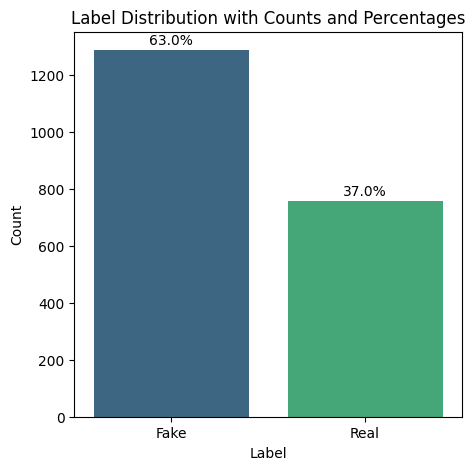

In [699]:
# Create a bar plot
plt.figure(figsize=(5, 5))
sns.barplot(x='Label', y='Count', data=df_labels, hue='Label', palette='viridis', dodge=False, legend=False)
for i, percentage in enumerate(df_labels['Percentage']):
    plt.text(i, df_labels['Count'][i] + 20, f'{percentage:.1f}%', ha='center')
plt.title('Label Distribution with Counts and Percentages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### 5.3.2 Type vs Label distribution

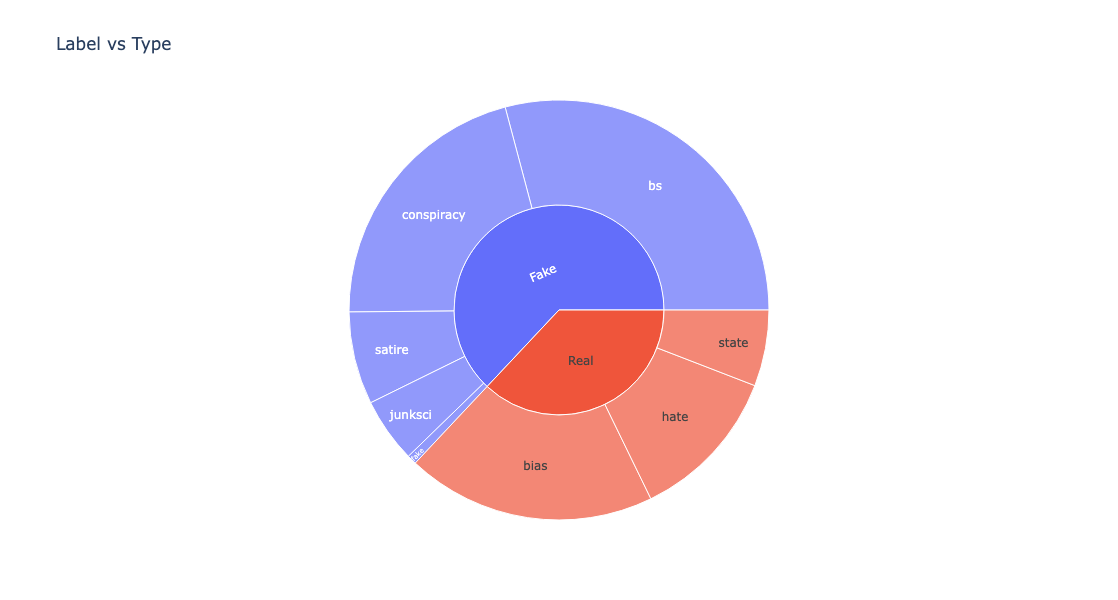

In [691]:
# sunburst plot of types within labels 
fig = px.sunburst(df_req, path=['label', 'type'], title='Label vs Type')
fig.update_layout(width=600, height=600)  # Set the dimensions as required
fig.show()

## 5.4 Text processing 

### 5.4.1 Text cleaning 
#### clean_text: Author, Title and Text
- Convert all text to lowercase to maintain uniformity
- Remove HTML tags, unwanted characters (numbers and special symbols) from the author, title and text (without stopwords) columns
    - Stopwords have already been removed from the text in the data provided (text_without_stopwords) 
#### clean_site_url: Website 
- Convert to lowercase 
- Remove numbers
- Split the URL into tokens using the specified delimiters (., /, ?, =, _, -)
#### clean_img_url: Image URLs
- Convert to lowercase for uniformity and to handle cases where file extensions and other unwanted parts are in uppercase
- Remove Unwanted portions:
    - Protocol (http://, https://, www.)
    - Numbers
    - File extensions (jpg, jpeg, png, gif, bmp)
    - Words that appear commonly in image urls that do not contribute to analysis 
- Tokenize: Split the URL into tokens using the specified delimiters (., /, ?, =, %, _, -)
- Returns only first 10 tokens to reduce noise and unnecessary trailing tokens that do not contribute to analysis 

In [652]:
def clean_text(text):
    # convert to lowercase
    text = text.lower()
    
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)

    # remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    return text
    
def clean_site_url(url):
    url = url.lower()

    # Remove numbers
    url = re.sub(r'\d+', '', url)
    
    # Split by delimiters
    tokens = re.split(r'[./?=_-]+', url)
    
    # Remove any empty tokens and join remaining tokens
    tokens = [token for token in tokens if token]
    
    return ' '.join(tokens)

def clean_img_url(url):
    # Convert to lowercase
    url = url.lower()
    
     # Remove 'http://', 'https://', and 'www.'
    url = re.sub(r'https?://(www\.)?', '', url)

    # Remove numbers
    url = re.sub(r'\d+', '', url)
    
    # Remove file extensions (with or without a preceding dot)
    url = re.sub(r'\.?(\bjpg\b|\bjpeg\b|\bpng\b|\bgif\b|\bbmp\b)', '', url)
    
    # Remove unwanted words
    unwanted_words = ['uploads', 'content', 'images', 'files', 'fullscreen', 'capture']
    for word in unwanted_words:
        url = url.replace(word, '')
    
    # Split by delimiters including % 
    tokens = re.split(r'[./?=%_\-]+', url)
    
    # Remove any empty tokens and join remaining tokens
    tokens = [token for token in tokens if token]
    
    return ' '.join(tokens[:10]) # Only return the first 10 tokens to reduce noise 

df_clean = df_req.drop(columns = ['author', 'site_url', 'main_img_url', 'title_without_stopwords', 'text_without_stopwords'])
df_clean['site_url_clean'] = df_req['site_url'].apply(clean_site_url)
df_clean['main_img_url_clean'] = df_req['main_img_url'].apply(clean_img_url)
df_clean['author_clean'] = df_req['author'].apply(clean_text)
df_clean['title_clean'] = df_req['title_without_stopwords'].apply(clean_text)
df_clean['text_clean'] = df_req['text_without_stopwords'].apply(clean_text)

df_clean.sample(2)

,language,type,label,hasImage,site_url_clean,main_img_url_clean,author_clean,title_clean,text_clean
1382,english,junksci,Fake,1.0,naturalnews com,naturalnews com gallery copyrighted donna brazile,mike adams naturalnews editor,common painkillers linked increased heart fail...,sarah jones fri oct th pm donald trumps messag...
340,english,bs,Fake,1.0,ahtribune com,ahtribune com media hillary clinton india cfc,saurav dutt,hillary clinton india much heres,shares heartwarming moment amid carnage battle...


### 5.4.2 Replacing missing values and Grouping
- Replace missing values with placeholders that will not be affected by tokenization
    - "no image url" indicating missing image urls are removed as the boolean variable 'hasImage' provides that information 
- Combine columns with content information (title, text) and source information (author, site_url, main_img_url)

In [531]:
# Function to replace missing values 
def replace_missing_values(df):
    df['title_clean'] = df['title_clean'].replace('title', 'untitled')
    df['author_clean'] = df['author_clean'].replace('no author', 'anonymous')
    df['main_img_url_clean'] = df['main_img_url_clean'].replace('no image url', '')
    return df

df_clean = replace_missing_values(df_clean)
df_clean.sample(2)

,language,type,label,hasImage,site_url_clean,main_img_url_clean,author_clean,title_clean,text_clean
41,english,conspiracy,Fake,1.0,stcenturywire com,i wp com stcenturywire com wp hillary russia h...,anonymous,prof michel chossudovsky discusses hillary cli...,november wire leave comment episode sunday wir...
107,english,bs,Fake,0.0,abeldanger net,,anonymous,untitled,guy leaf trump whitehouse imagine shock everyt...


In [653]:
# New dataframe with combined columns
df_combined = df_clean.drop(columns = ['title_clean', 'text_clean', 'author_clean', 'site_url_clean', 'main_img_url_clean'])

# Joining the title and text columns - content
df_combined['content'] = df_clean['title_clean'] + ' ' + df_clean['text_clean']
# Joining the author, site_url, main_img_url columns - source
df_combined['source'] = df_clean['author_clean'] + ' ' + df_clean['site_url_clean'] + ' ' + df_clean['main_img_url_clean']

df_combined.sample(2)

,language,type,label,hasImage,content,source
220,english,conspiracy,Fake,0.0,mark ruffalo delivers mobile solar trailers st...,activist post activistpost com no image url
1973,english,bias,Real,1.0,title jesus shirt sparks school uproar legal a...,luke moseley westernjournalism com static west...


### 5.4.3 Tokenization and Lemmatization 
- Split both columns into individual words (tokens)
- Lemmatize content with POS tagging using spacy 

In [430]:
# Load English and German models
nlp_en = spacy.load("en_core_web_sm")
nlp_de = spacy.load("de_core_news_sm")

In [561]:
def tokenize_and_lemmatize(content, lang='en'):
    # Select the correct NLP model based on language
    nlp = nlp_de if lang == 'de' else nlp_en
    # Process the text
    doc = nlp(content)
    # Extract lemmas only
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]
    return lemmas

def tokenize_source(source):
    # Process the source string using English NLP model for simplicity
    doc = nlp_en(source)
    # Return tokens
    tokens = [token.text for token in doc if not token.is_punct]
    return tokens

In [562]:
df_processed = df_combined.drop(columns = ['content', 'source'])

# Apply tokenization and lemmatization to the content column
df_processed['content_lemmas'] = df_combined.apply(lambda row: tokenize_and_lemmatize(row['content'], row['language']), axis=1)

# Apply tokenization to the source column
df_processed['source_tokenized'] = df_combined['source'].apply(tokenize_source)

In [563]:
df_processed.sample(3)

,language,type,label,hasImage,content_lemmas,source_tokenized
963,german,bs,Fake,1.0,"[trkei, kritischer, journalist, interviewt, op...","[noreplybloggercom, der, postillon, der, posti..."
498,english,conspiracy,Fake,1.0,"[plenary, meeting, iraqi, sunnis, end, stress,...","[anonymous, awdnews, com, awdnews, com]"
1175,english,conspiracy,Fake,1.0,"[hillary, real, christian, say, michael, moore...","[paul, joseph, watson, infowars, com, hw, info..."


## 5.5 Preparing data for Classification 

### 5.5.1 Encoding categorical data and labels
With label encoders

In [655]:
# retaining only columns required for classification (hasImage, label)
df_encoded = df_processed.drop(columns = ['language', 'type', 'label', 'hasImage'])

# Initialize label encoder
le_label = LabelEncoder()

df_encoded['label_encoded'] = le_label.fit_transform(df_processed['label'])
df_encoded['hasImage_encoded'] = df_processed['hasImage'].astype('int')  

df_encoded.sample(2)

,content_lemmas,source_tokenized,label_encoded,hasImage_encoded
568,"[trump, lose, m, grab, musket, congressman, tw...","[anonymous, awdnews, com, awdnews, com]",0,1
204,"[anonymity, great, weapon, oppression, nick, b...","[activistpost, activistpost, com]",0,0


Using value count to determine how labels are encoded
- Fake:0, Real: 1

In [703]:
df_encoded['label_encoded'].value_counts()

label_encoded
0    1289
1     757
Name: count, dtype: int64

### 5.5.2 Feature extraction  
TF-IDF Vectorization 

In [657]:
# Convert lists of lemmas and tokens to single strings - as required by tfidf vectorizer
df_encoded['content_str'] = df_encoded['content_lemmas'].apply(lambda x: ' '.join(x))
df_encoded['source_str'] = df_encoded['source_tokenized'].apply(lambda x: ' '.join(x))

In [658]:
# Initialize TF-IDF Vectorizers
tfidf_vectorizer_content = TfidfVectorizer()
tfidf_vectorizer_source = TfidfVectorizer()

# Fit and Transform Data
content_tfidf = tfidf_vectorizer_content.fit_transform(df_encoded['content_str'])
source_tfidf = tfidf_vectorizer_source.fit_transform(df_encoded['source_str'])

### 5.5.3 Prepare Features and Labels

In [659]:
# convert TF-IDF sparse matrices to DataFrames
content_tfidf_df = pd.DataFrame(content_tfidf.toarray(), columns=tfidf_vectorizer_content.get_feature_names_out())
source_tfidf_df = pd.DataFrame(source_tfidf.toarray(), columns=tfidf_vectorizer_source.get_feature_names_out())

# match RangeIndex by reseting the Dataframe indexes 
df_encoded.reset_index(drop=True, inplace=True)
content_tfidf_df.reset_index(drop=True, inplace=True)
source_tfidf_df.reset_index(drop=True, inplace=True)

# concatenate selected features 
final_features = pd.concat([df_encoded[['hasImage_encoded']], content_tfidf_df, source_tfidf_df], axis=1, join='inner')

# Split the data into features and labels 
X = final_features  # features
y = df_encoded['label_encoded']  # labels

## 5.6 Balancing the Dataset 
using SMOTE (Synthetic Minority Over-sampling Technique) to balance the label column
### 5.6.1 Train test split and Resampling 

In [661]:
# Split data into training and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the balance
print(f"Before SMOTE: {y_train.value_counts()}")
print(f"After SMOTE: {pd.Series(y_train_smote).value_counts()}")

Before SMOTE: label_encoded
0    890
1    542
Name: count, dtype: int64
After SMOTE: label_encoded
1    890
0    890
Name: count, dtype: int64


# 7 Classification 
## 7.1 Training 

In [707]:
# Initialize the AdaBoost classifier
# With decision tree as the base estimator
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
                            n_estimators=5,
                            algorithm='SAMME',
                            learning_rate=1.0,
                            random_state=42
)

# Train the classifier
ada_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_clf.predict(X_test)

## 7.1 Testing and Evaluation 

In [710]:
labels = [0, 1]  # Adjust labels based on how they are encoded in y_test and y_pred

conf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=labels)
# Create a DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True:Fake', 'True:Real'], columns=['Pred:Fake', 'Pred:Real'])

# Print the DataFrame
print("Confusion Matrix:")
print(conf_matrix_df)

print("\nPrecision:", metrics.precision_score(y_test, y_pred))
print("\nRecall:", metrics.recall_score(y_test, y_pred))
print("\nF1 Score:", metrics.f1_score(y_test, y_pred))

# ROC and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("\nAUC:", metrics.auc(fpr, tpr))

# Precision-Recall Curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)
print("\nAverage Precision:", metrics.average_precision_score(y_test, y_pred))

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

Confusion Matrix:
           Pred:Fake  Pred:Real
True:Fake        393          6
True:Real          4        211

Precision: 0.9723502304147466

Recall: 0.9813953488372092

F1 Score: 0.9768518518518519

AUC: 0.9831788774261235

Average Precision: 0.960774651550277

Accuracy: 0.9837133550488599
